In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm #Used to display images in a specific colormap
from scipy.io import loadmat
from scipy.optimize import minimize

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
np.set_printoptions(suppress=True) # Don't print scietific numbers form

In [101]:
data = loadmat('data/ex6data1.mat')
X = data['X']
y = data['y']

In [102]:
def plot_function(px, py, nx, ny, c1, c2, xmin, xmax, ymin, ymax, label1, label2):
    plt.scatter(px, py, c='k',marker = 'o',s=50, label=c1)
    plt.scatter(nx, ny, c='y',marker = '+',s=50, label=c2)

    plt.gca().set_xlim([xmin, xmax])
    plt.gca().set_ylim([ymin, ymax])
    plt.gca().set_xlabel(label1)
    plt.gca().set_ylabel(label2)
    plt.gca().legend(bbox_to_anchor=(1.0, 1.0), fancybox=True)

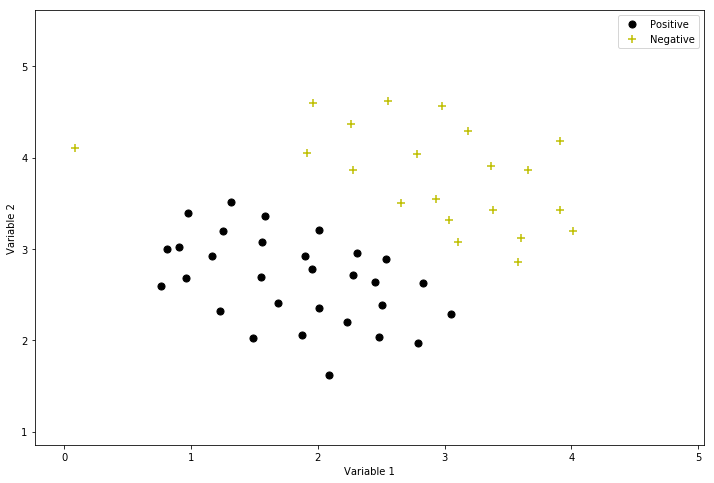

In [103]:
plot_function(X[y[:,0] == 0][:,0], X[y[:,0] == 0][:,1], X[y[:,0] == 1][:,0],
              X[y[:,0] == 1][:,1], "Positive", "Negative", (X[y[:,0] == 0][:,0]).min() - 1,
              (X[y[:,0] == 0][:,0]).max() + 2, (X[y[:,0] == 1][:,1]).min() - 2, (X[y[:,0] == 1][:,1]).max() + 1, "Variable 1",
              "Variable 2")


In [104]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=1)
clf.fit(X,y)

/Users/nishant/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

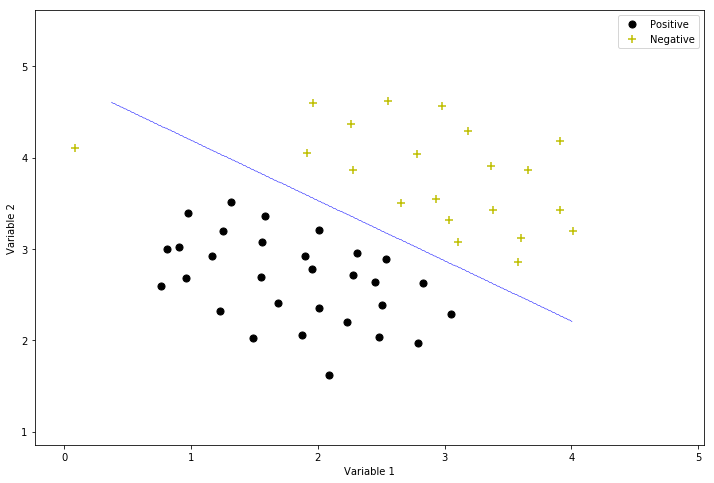

In [105]:
plot_function(X[y[:,0] == 0][:,0], X[y[:,0] == 0][:,1], X[y[:,0] == 1][:,0],
              X[y[:,0] == 1][:,1], "Positive", "Negative", (X[y[:,0] == 0][:,0]).min() - 1,
              (X[y[:,0] == 0][:,0]).max() + 2, (X[y[:,0] == 1][:,1]).min() - 2, (X[y[:,0] == 1][:,1]).max() + 1, "Variable 1",
              "Variable 2")
xx1,xx2 = np.meshgrid(np.arange(X[:,0].min(),X[:,0].max(),0.01),np.arange(X[:,1].min(),X[:,1].max(),0.01))
z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
z = z.reshape(xx1.shape)
plt.contour(xx1, xx2, z, [0.5], linewidths=0.5, colors='b')

In [106]:
clf100 = svm.SVC(kernel='linear',C=100)
clf100.fit(X,y)

/Users/nishant/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

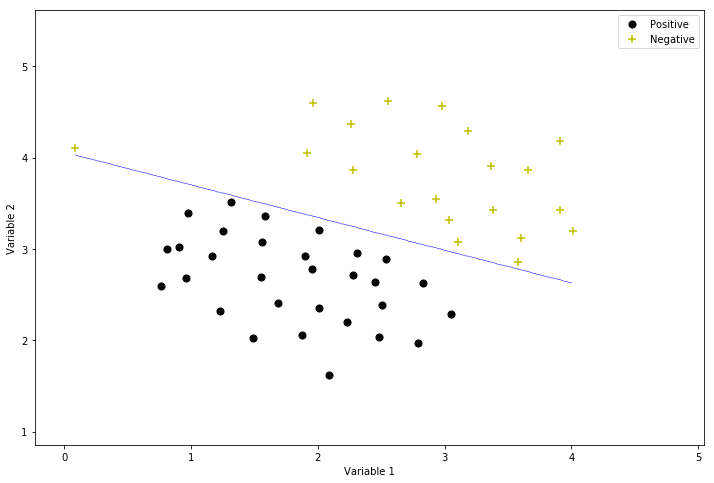

In [107]:
plot_function(X[y[:,0] == 0][:,0], X[y[:,0] == 0][:,1], X[y[:,0] == 1][:,0],
              X[y[:,0] == 1][:,1], "Positive", "Negative", (X[y[:,0] == 0][:,0]).min() - 1,
              (X[y[:,0] == 0][:,0]).max() + 2, (X[y[:,0] == 1][:,1]).min() - 2, (X[y[:,0] == 1][:,1]).max() + 1, "Variable 1",
              "Variable 2")
xx1,xx2 = np.meshgrid(np.arange(X[:,0].min(),X[:,0].max(),0.01),np.arange(X[:,1].min(),X[:,1].max(),0.01))
z = clf100.predict(np.c_[xx1.ravel(), xx2.ravel()])
z = z.reshape(xx1.shape)
plt.contour(xx1, xx2, z, [0.5], linewidths=0.5, colors='b')

In [150]:
def gaussian_kernel(x1,x2,sigma):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return np.exp(-(np.square(np.linalg.norm(x1-x2))/(2*np.square(sigma))))
    

In [151]:
x1 = [1, 2, 1]; x2 = [0, 4, -1]; sigma = 2;
sim = gaussian_kernel(x1, x2, sigma);
print(sim)

0.324652467358


In [158]:
data2 = loadmat('data/ex6data2.mat')
X = data2['X']
y = data2['y']

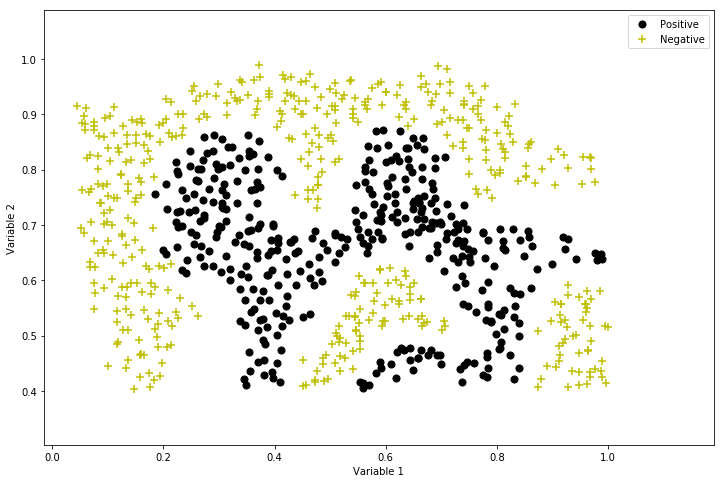

In [161]:
plot_function(X[y[:,0] == 0][:,0], X[y[:,0] == 0][:,1], X[y[:,0] == 1][:,0],
              X[y[:,0] == 1][:,1], "Positive", "Negative", (X[y[:,0] == 0][:,0]).min() - 0.20,
              (X[y[:,0] == 0][:,0]).max() + 0.20, (X[y[:,0] == 1][:,1]).min() - 0.10, (X[y[:,0] == 1][:,1]).max() + 0.10, "Variable 1",
              "Variable 2")

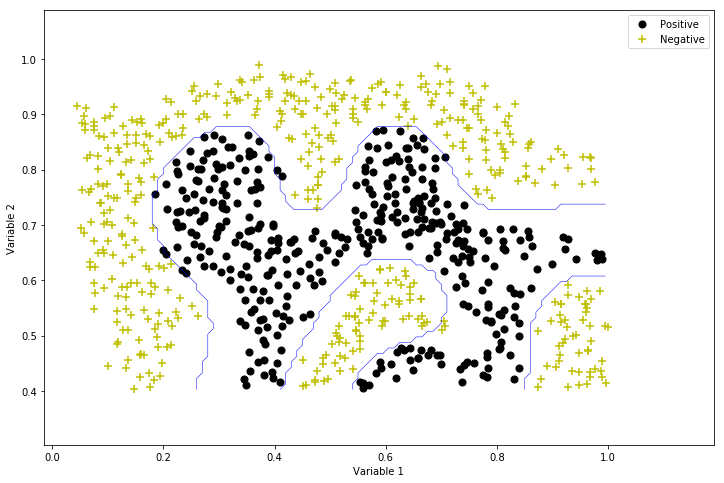

In [164]:
# Train the SVM with the Gaussian kernel on this dataset.# Train  
sigma = 0.1
gamma = 1/(2*sigma**2)
gausSvm = svm.SVC(C=1, kernel='rbf', gamma=gamma)
gausSvm.fit( X, y.flatten() )
plot_function(X[y[:,0] == 0][:,0], X[y[:,0] == 0][:,1], X[y[:,0] == 1][:,0],
              X[y[:,0] == 1][:,1], "Positive", "Negative", (X[y[:,0] == 0][:,0]).min() - 0.20,
              (X[y[:,0] == 0][:,0]).max() + 0.20, (X[y[:,0] == 1][:,1]).min() - 0.10, (X[y[:,0] == 1][:,1]).max() + 0.10, "Variable 1",
              "Variable 2")
xx1,xx2 = np.meshgrid(np.arange(X[:,0].min(),X[:,0].max(),0.01),np.arange(X[:,1].min(),X[:,1].max(),0.01))
z = gausSvm.predict(np.c_[xx1.ravel(), xx2.ravel()])
z = z.reshape(xx1.shape)
plt.contour(xx1, xx2, z, [0.5], linewidths=0.5, colors='b')

In [195]:
data3 = loadmat('data/ex6data3.mat')
# print(data3)
X = data3['X']
y = data3['y']
Xval = data3['Xval']
yval = data3['yval']

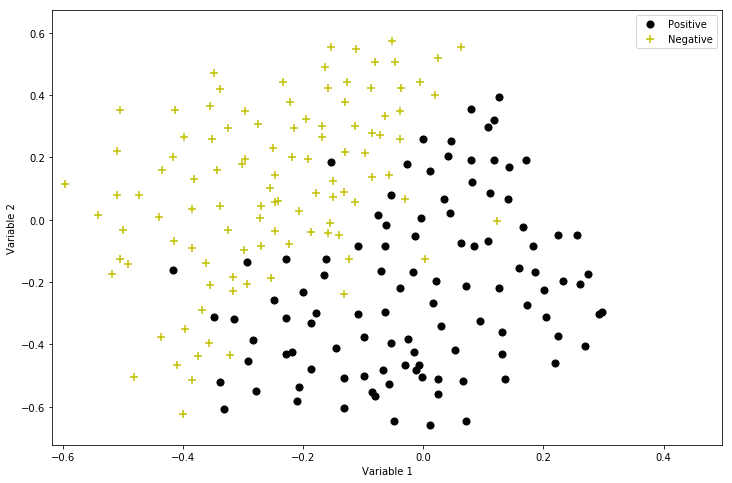

In [196]:
plot_function(X[y[:,0] == 0][:,0], X[y[:,0] == 0][:,1], X[y[:,0] == 1][:,0],
              X[y[:,0] == 1][:,1], "Positive", "Negative", (X[y[:,0] == 0][:,0]).min() - 0.20,
              (X[y[:,0] == 0][:,0]).max() + 0.20, (X[y[:,0] == 1][:,1]).min() - 0.10, (X[y[:,0] == 1][:,1]).max() + 0.10, "Variable 1",
              "Variable 2")

In [200]:
sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
costs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma_list = list()
val_errors = list()
for s in sigma:
    for c in costs:
        gamma = 1/(2*s**2)
        gausSvm = svm.SVC(C=c, kernel='rbf', gamma=gamma)
        gausSvm.fit( X, y.flatten() )
        val_errors.append(gausSvm.score(data3['Xval'], data3['yval'].ravel()))
        sigma_list.append((s,c))

In [216]:
s,c = sigma_list[np.argmax(val_errors)]

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


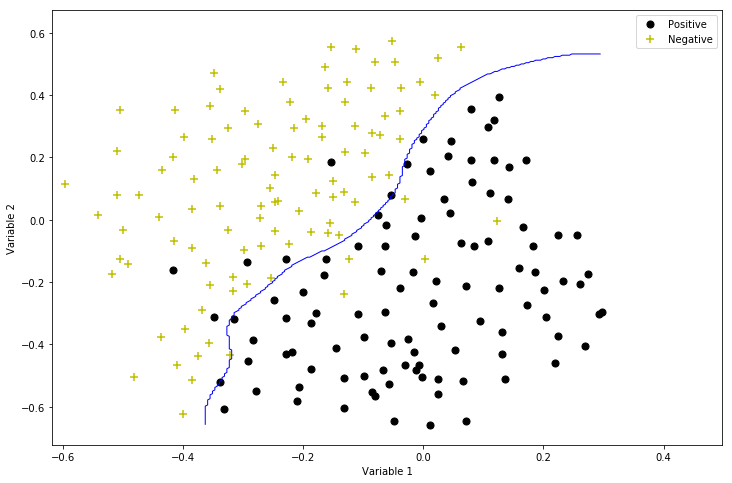

In [220]:
gausSvm = svm.SVC(kernel = 'rbf', gamma = 1/(2*(s)**2), C = c, decision_function_shape = 'ovr')
gausSvm.fit( data3['X'], data3['y'].ravel() )
print(gausSvm)

plot_function(X[y[:,0] == 0][:,0], X[y[:,0] == 0][:,1], X[y[:,0] == 1][:,0],
              X[y[:,0] == 1][:,1], "Positive", "Negative", (X[y[:,0] == 0][:,0]).min() - 0.20,
              (X[y[:,0] == 0][:,0]).max() + 0.20, (X[y[:,0] == 1][:,1]).min() - 0.10, (X[y[:,0] == 1][:,1]).max() + 0.10, "Variable 1",
              "Variable 2")
xx1,xx2 = np.meshgrid(np.arange(X[:,0].min(),X[:,0].max(),0.004),np.arange(X[:,1].min(),X[:,1].max(),0.004))
z = gausSvm.predict(np.c_[xx1.ravel(), xx2.ravel()])
z = z.reshape(xx1.shape)
plt.contour(xx1, xx2, z, [0.5], linewidths=1.0, colors='b')